In [1]:
"""
Calculate the WKB approximation for the power law case of the axion relic density.
"""

'\nCalculate the WKB approximation for the power law case of the axion relic density.\n'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u, constants as c
from config import model, plot_path

In [3]:
N = 200

In [4]:
# model paramter
m_a_linear = np.logspace(-24, -12, N) # [eV]
phi_i_linear = 1e9 * np.logspace(13, 18, N) # [eV]
m_a, phi_i = np.meshgrid(m_a_linear, phi_i_linear)

$$
z_\mathrm{eq} = \frac{\rho_c \Omega_m(t_0)}{\rho_\gamma(t_0)} - 1
\Rightarrow 
\Omega_\gamma = \frac{\rho_\gamma}{\rho_c} = \frac{\Omega_m}{z_\mathrm{eq} + 1}
$$

In [5]:
# compute the axion relic density parameter
Omega_a = 1/6 * (9*model.Omega_rad)**(3/4) * (m_a / model.H0)**(1/2) * (phi_i / model.M_pl)**2

In [6]:
Omega_a[Omega_a*model.h**2 > model.Omega_DM_h_sq] = 0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


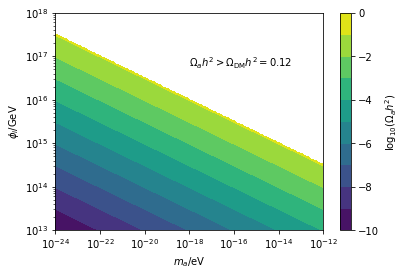

In [7]:
# plot
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_xscale("log")
ax.set_yscale("log")
plt.contourf(m_a, phi_i / 1e9, np.log10(Omega_a * model.h**2), 10)
plt.xlabel(r"$m_a / \mathrm{eV}$")
plt.ylabel(r"$\phi_i / \mathrm{GeV}$")
plt.text(0.5, 0.75, r"$\Omega_a h^2 > \Omega_\mathrm{DM} h^2 = 0.12$", transform=ax.transAxes)
cbar = plt.colorbar()
cbar.ax.set_ylabel(r"$\log_{10}(\Omega_a h^2)$")
plt.savefig(plot_path + "/pow_law_wkb_plot.pdf")